# Spatiale avec matrice de grain

### Importation des librairies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import ListedColormap
import random

### Paramètres de la simulation

In [2]:
grid_size = 50          # Taille de la grille
steps = 500             # Nb d'étapes de simulation
initial_prey = 500      # Nb initial de proies
initial_predators = 200 # Nb initial de prédateurs

proba_reproduce = 0.35   # Prob qu'une proie se reproduise dans une case vide voisine
proba_predate = 0.4     # Prob qu'un prédateur mange une proie voisine
proba_mortality = 0.2   # Prob qu'un prédateur meurt
proba_migrate = 0.25    # Prob qu'un individu migre vers une case voisine

### Types d'occupants sur la grille

In [3]:
EMPTY = 0
PREY = 1
PREDATOR = 2

### Matrice de gain

In [4]:
# Matrice de gains
payoff_matrix = {
    (EMPTY, PREY): +0.1,     # Gain marginal pour la reproduction des proies
    (PREDATOR, PREY): +0.2,  # Gain pour la prédation
    (PREDATOR, EMPTY): -0.2, # Coût pour la survie d'un prédateur sans nourriture
}

### Initialisation de la grille

In [5]:
def initialize_grid(grid_size, initial_prey, initial_predators):
    grid = np.zeros((grid_size, grid_size), dtype=int)
    # Ajout des proies
    for _ in range(initial_prey):
        x, y = np.random.randint(0, grid_size, 2)
        while grid[x, y] != EMPTY:
            x, y = np.random.randint(0, grid_size, 2)
        grid[x, y] = PREY
    # Ajout des prédateurs
    for _ in range(initial_predators):
        x, y = np.random.randint(0, grid_size, 2)
        while grid[x, y] != EMPTY:
            x, y = np.random.randint(0, grid_size, 2)
        grid[x, y] = PREDATOR
    return grid

### Récupération des voisins d'une cellule (avec bords périodiques)

In [6]:
def get_neighbors(grid, x, y):
    grid_size = grid.shape[0]
    neighbors = [
        ((x - 1) % grid_size, y),      # Haut
        ((x + 1) % grid_size, y),      # Bas
        (x, (y - 1) % grid_size),      # Gauche
        (x, (y + 1) % grid_size)       # Droite
    ]
    return neighbors

### probabilités ajustés

In [7]:
# Fonction pour ajuster les probabilités
def get_adjusted_probability(base_prob, state, neighbor_state):
    payoff = payoff_matrix.get((state, neighbor_state), 0)
    adjusted_prob = base_prob * (1 + payoff)
    return max(0, min(1, adjusted_prob))

### Mettre à jour la grille

In [8]:
# Mise à jour Monte Carlo
def update_grid_with_adjusted_prob(grid, sigma, lambda_, mu, D):
    grid_size = grid.shape[0]
    new_grid = grid.copy()
    
    for _ in range(grid_size * grid_size):
        x, y = np.random.randint(0, grid_size, 2)
        r = np.random.rand()
        
        if grid[x, y] == PREY:
            # Reproduction
            neighbors = get_neighbors(grid, x, y)
            empty_neighbors = [(nx, ny) for nx, ny in neighbors if grid[nx, ny] == EMPTY]
            if empty_neighbors and r < get_adjusted_probability(sigma, PREY, EMPTY):
                nx, ny = random.choice(empty_neighbors)
                new_grid[nx, ny] = PREY
                
        elif grid[x, y] == PREDATOR:
            # Prédation
            neighbors = get_neighbors(grid, x, y)
            prey_neighbors = [(nx, ny) for nx, ny in neighbors if grid[nx, ny] == PREY]
            if prey_neighbors and r < get_adjusted_probability(lambda_, PREDATOR, PREY):
                nx, ny = random.choice(prey_neighbors)
                new_grid[nx, ny] = PREDATOR
            # Mortalité
            elif r < get_adjusted_probability(mu, PREDATOR, EMPTY):
                new_grid[x, y] = EMPTY
                
    return new_grid

## MAIN

In [9]:
grid = initialize_grid(grid_size, initial_prey, initial_predators)

### Affichage de la grile tous les x steps

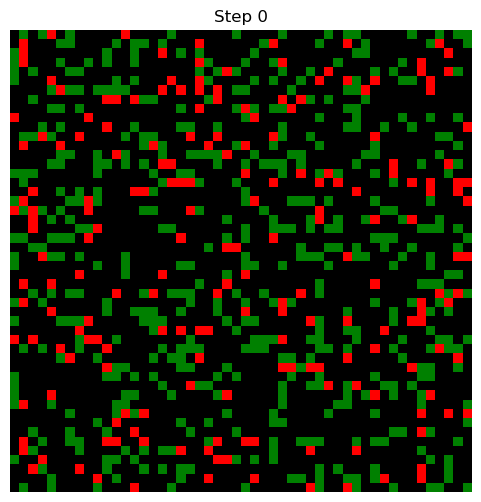

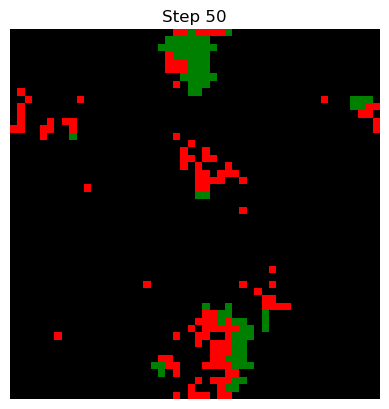

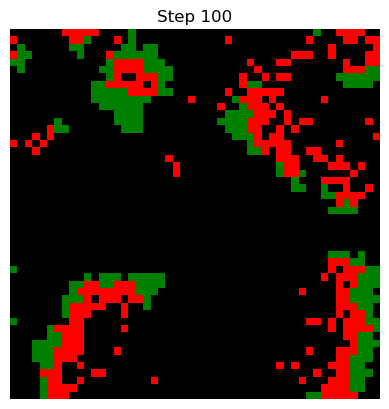

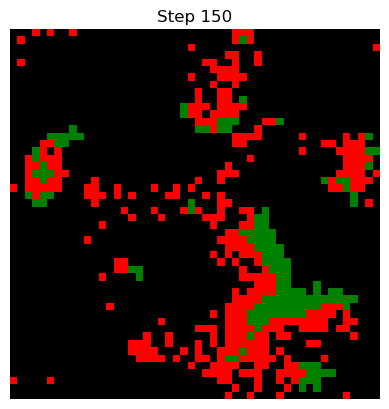

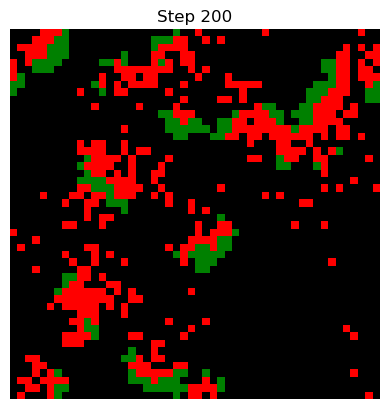

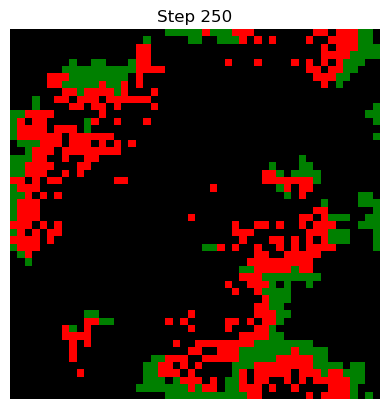

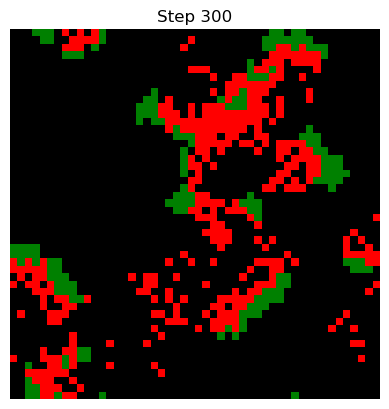

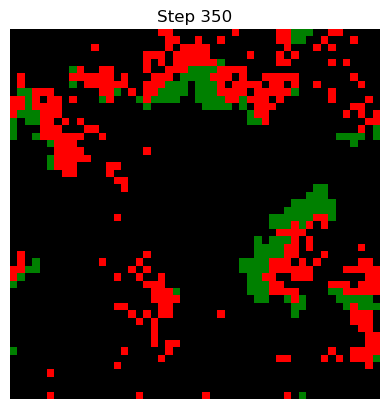

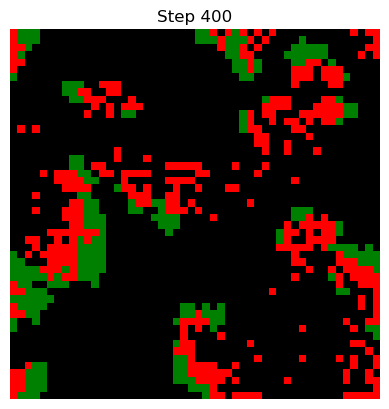

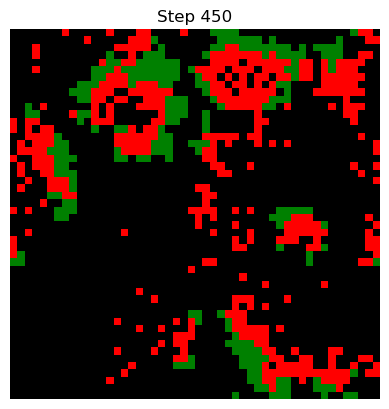

In [10]:
cmap = ListedColormap(['black', 'green', 'red'])

plt.figure(figsize=(6, 6))
for step in range(steps):
    if step % 50 == 0:  # Affiche tous les 50 steps
        plt.imshow(grid, cmap=cmap, vmin=0, vmax=2)
        plt.title(f"Step {step}")
        plt.axis('off')
        plt.pause(0.1)
    grid = update_grid_with_adjusted_prob(grid, proba_reproduce, proba_predate, proba_mortality, proba_migrate)

plt.show()

### Affichage de la proportion d'individu au cours du temps

In [17]:
grid = initialize_grid(grid_size, initial_prey, initial_predators)

densities_prey = []
densities_predator = []
densities_empty = []

for temps in range(steps):
    # Comptage des types de cellules
    nbP = np.sum(grid == PREY)
    nbH = np.sum(grid == PREDATOR)
    nbV = np.sum(grid == EMPTY)

    # Calcul des densités
    densities_prey.append(nbP / (grid_size*grid_size))
    densities_predator.append(nbH / (grid_size*grid_size))
    densities_empty.append(nbV / (grid_size*grid_size))

    # Mise à jour de la grille
    grid = update_grid_with_adjusted_prob(grid, proba_reproduce, proba_predate, proba_mortality, proba_migrate)

### Visulatisation des desiités de population au cours du temps

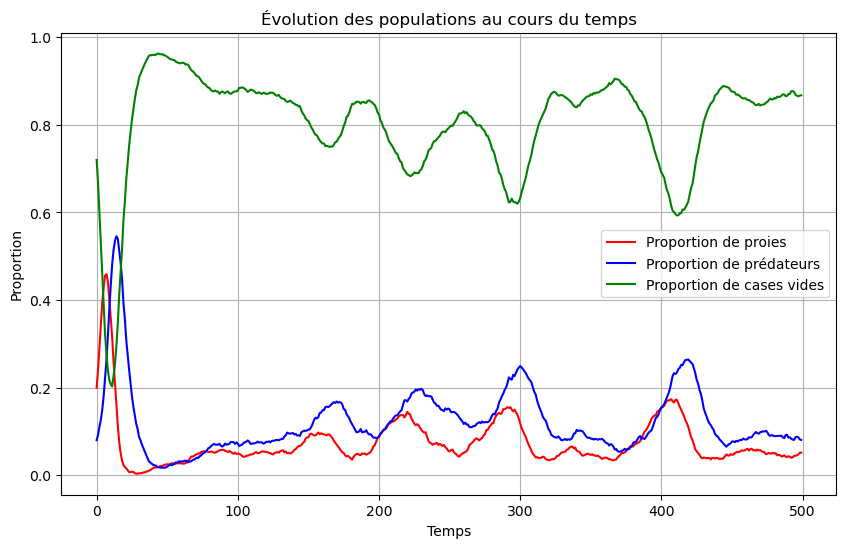

In [18]:
# Visualisation des densités
plt.figure(figsize=(10, 6))
plt.plot(densities_prey, label="Proportion de proies", color='red')
plt.plot(densities_predator, label="Proportion de prédateurs", color='blue')
plt.plot(densities_empty, label="Proportion de cases vides", color='green')
plt.title("Évolution des populations au cours du temps")
plt.xlabel("Temps")
plt.ylabel("Proportion")
plt.legend()
plt.grid()
plt.show()

In [19]:
n_simulations = 30

# Simuler x fois et collecter les résultats
def run_simulations(n_simulations):
    all_densities_prey = []
    all_densities_predator = []
    all_densities_empty = []
    for sim in range(n_simulations):
        grid = initialize_grid(grid_size, initial_prey, initial_predators)
        densities_prey = []
        densities_predator = []
        densities_empty = []
        for _ in range(steps):
            nbP = np.sum(grid == PREY)
            nbH = np.sum(grid == PREDATOR)
            nbV = np.sum(grid == EMPTY)
            densities_prey.append(nbP / (grid_size * grid_size))
            densities_predator.append(nbH / (grid_size * grid_size))
            densities_empty.append(nbV / (grid_size * grid_size))
            grid = update_grid_with_adjusted_prob(grid, proba_reproduce, proba_predate, proba_mortality, proba_migrate)
        all_densities_prey.append(densities_prey)
        all_densities_predator.append(densities_predator)
        all_densities_empty.append(densities_empty)
    return np.array(all_densities_prey), np.array(all_densities_predator), np.array(all_densities_empty)

In [21]:
# Exécuter les simulations
prey_simple, predator_simple, empty_simple = run_simulations(n_simulations)

In [25]:
# Moyennes et écarts-types
mean_prey = np.mean(prey_simple, axis=0)
std_prey = np.std(prey_simple, axis=0)

mean_predator = np.mean(predator_simple, axis=0)
std_predator = np.std(predator_simple, axis=0)

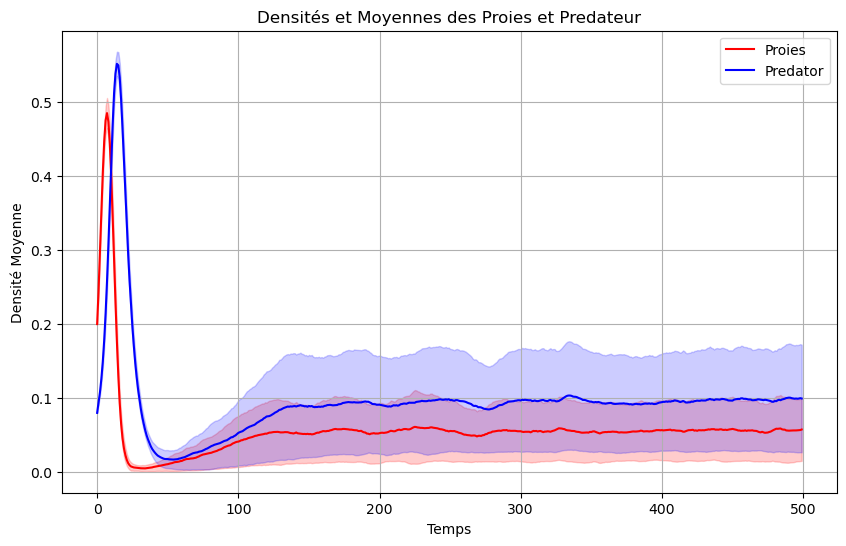

In [26]:
# Tracé des résultats
plt.figure(figsize=(10, 6))
plt.plot(mean_prey_simple, label="Proies", color='red')
plt.fill_between(range(steps), mean_prey_simple - std_prey_simple, mean_prey_simple + std_prey_simple, color='red', alpha=0.2)
plt.plot(mean_predator, label="Predator", color='blue')
plt.fill_between(range(steps), mean_predator - std_predator, mean_predator + std_predator, color='blue', alpha=0.2)
plt.title("Densités et Moyennes des Proies et Predateur")
plt.xlabel("Temps")
plt.ylabel("Densité Moyenne")
plt.legend()
plt.grid()
plt.show()